In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_filepath = './../inpocket/'

In [ ]:
labels = ['','Climibing up','Climbing down','Queue','Standing','Walking','In Train']
files = os.listdir(data_filepath)
a = 0
fig=[]
axs=[]
lim = []
for i in range(7):
    fig_,axs_ = plt.subplots(10,figsize=(30,100))
    fig.append(fig_)
    axs.append(axs_)
    lim.append(0)



for i,file_ in enumerate(files):
    print(i)
    data = pd.read_csv(data_filepath + file_)
    data['MODE'] = data['MODE'].replace('High',6)
    data['MODE'] = data['MODE'].replace('Low',6)
    cur = -1
    st = 0
    end = 0
    for c,row in data.iterrows():
        if cur == -1 and pd.isna(row['MODE']) is False:
            cur = row['MODE']
            st = c
        if (row['MODE'] != cur and pd.isna(row['MODE']) is False) or (len(data) == c + 1 and row['MODE'] == cur):
            end = c
            #with open(str(cur) + '.csv','a+') as f:
            if os.path.isfile(str(int(cur)) + '.csv'):
                data[st:end].to_csv(str(int(cur)) + '.csv',mode = 'a+',header = False)
                
            else:
                data[st:end].to_csv(str(int(cur)) + '.csv',mode = 'a+')
                #le = 200
                #ts = data['X AXIS'][st:end]
                #ma =  np.max(ts)
                #mi = np.min(ts)
                #ts = (ts - mi)/(ma -mi)

                #for i in range(st,end,le):
                 #   if(i+le>=end):
                 #       continue
            #sns.lineplot(y = data['X AXIS'][i:i+le], x = np.arange(le), ax = axs)
            #print(ts)
            #ts_ = ts[i-st:i+le-st]
            #mu =  np.mean(ts_)
            #sigma = np.std(ts_)
            #ts_ = (ts_ - mu)/sigma
            le = 200
            cur = int(cur)
            
            if end -st > le and lim[cur]<9:
                lim[cur]+=1
                    #fig,axs = plt.subplots(10,figsize=(30,100))
                print(axs[cur])
                axs[cur][lim[cur]].set_title(str(len(data[st:end]))+'_'+str(labels[int(cur)]) ,fontsize=18)

                axs[cur][lim[cur]].set_ylim(bottom = -0.03, top  = 0.03)

                sns.lineplot(y = data['Y AXIS'][st:st + le], x = np.arange(le), ax = axs[cur][lim[cur]])

                #bottom, top = axs[lim].get_ylim()  
                #print(bottom,top)

            st = end
            cur = row['MODE']
for i in range(7):
    fig[i].savefig(str(i)+'_y.jpg')

In [ ]:
files = os.listdir(data_filepath)
for i,file_ in enumerate(files):
    print(i)
    data = pd.read_csv(data_filepath + file_)
    data['MODE'] = data['MODE'].replace('High',6)
    data['MODE'] = data['MODE'].replace('Low',6)
    cur = -1
    st = 0
    end = 0
    for c,row in data.iterrows():
        if cur == -1 and pd.isna(row['MODE']) is False:
            cur = row['MODE']
            st = c
        if (row['MODE'] != cur and pd.isna(row['MODE']) is False) or (len(data) == c + 1 and row['MODE'] == cur):
            end = c
            #with open(str(cur) + '.csv','a+') as f:
            if os.path.isfile(str(int(cur)) + '.csv'):
                data[st:end].to_csv(str(int(cur)) + '.csv',mode = 'a+',header = False)
                
            else:
                data[st:end].to_csv(str(int(cur)) + '.csv',mode = 'a+')
            if cur == 3 or cur == 5:
                le = 200
                ts = data['X AXIS'][st:end]
                #ma =  np.max(ts)
                #mi = np.min(ts)
                #ts = (ts - mi)/(ma -mi)

                for i in range(st,end,le):
                    if(i+le>=end):
                        continue
                    fig,axs = plt.subplots(figsize=(30,10))
                    axs.set_ylim(bottom = -1, top  = 1)
                    #sns.lineplot(y = data['X AXIS'][i:i+le], x = np.arange(le), ax = axs)
                    #print(ts)
                    ts_ = ts[i-st:i+le-st]
                    mu =  np.mean(ts_)
                    sigma = np.std(ts_)
                    ts_ = (ts_ - mu)/sigma

                    sns.lineplot(y = ts_, x = np.arange(le), ax = axs)

                    bottom, top = axs.get_ylim()  
                    print(bottom,top)
                    axs.set_title(str(len(data[st:end]))+'_'+str(cur) + '_' +str(top) + '_' + str(bottom),fontsize=18)
                    plt.show()

            st = end
            cur = row['MODE']


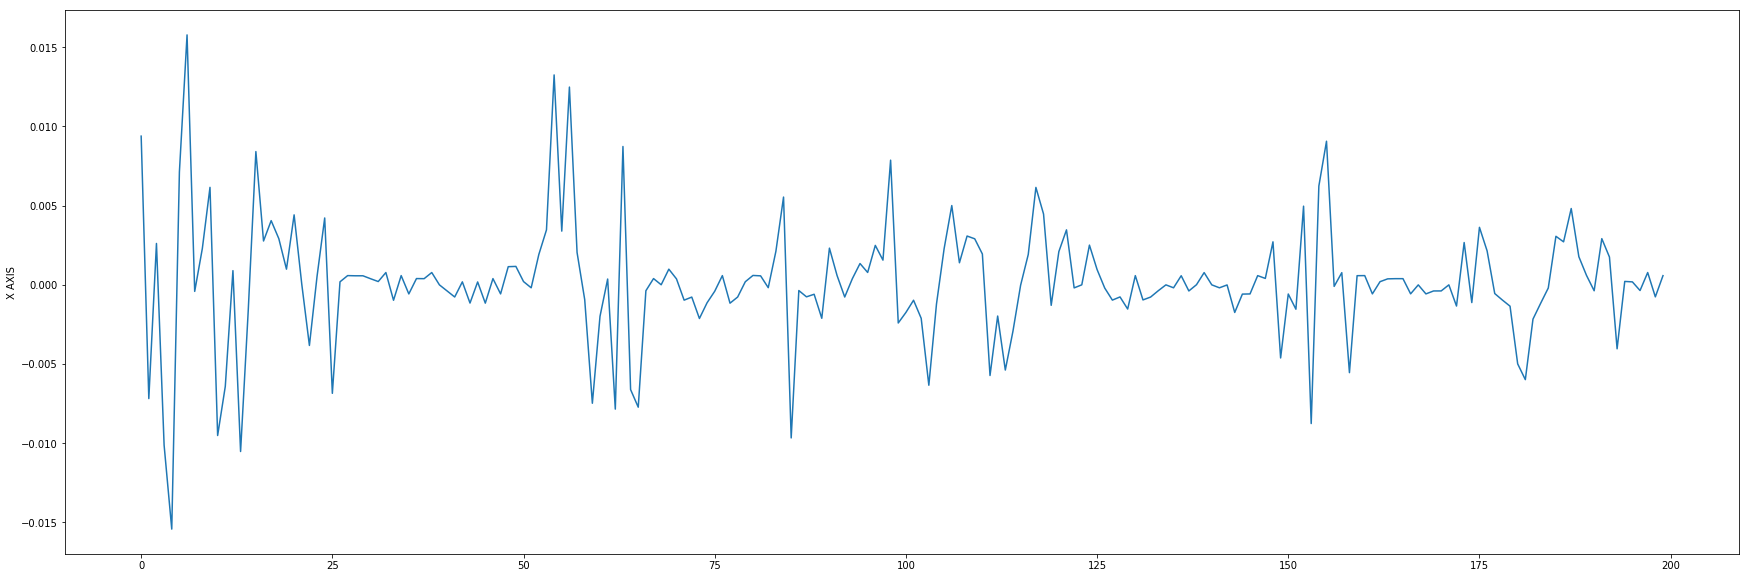

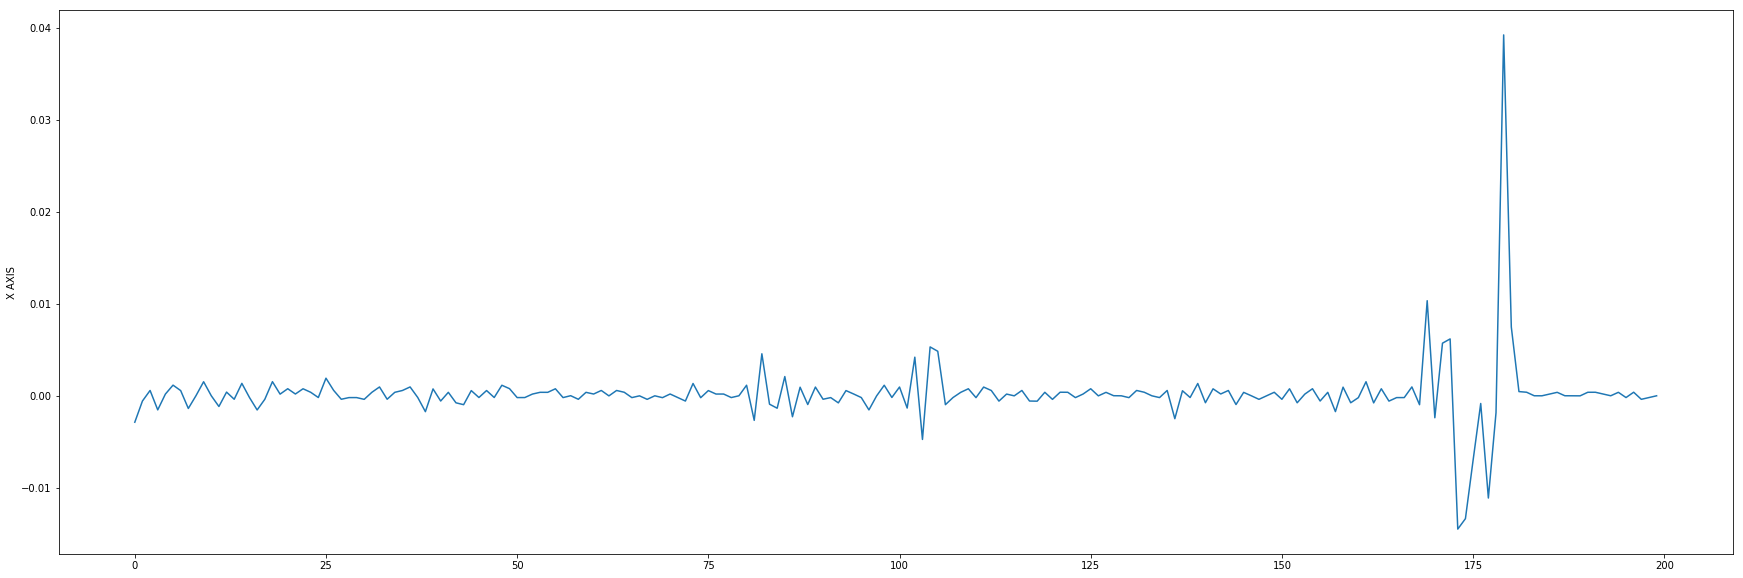

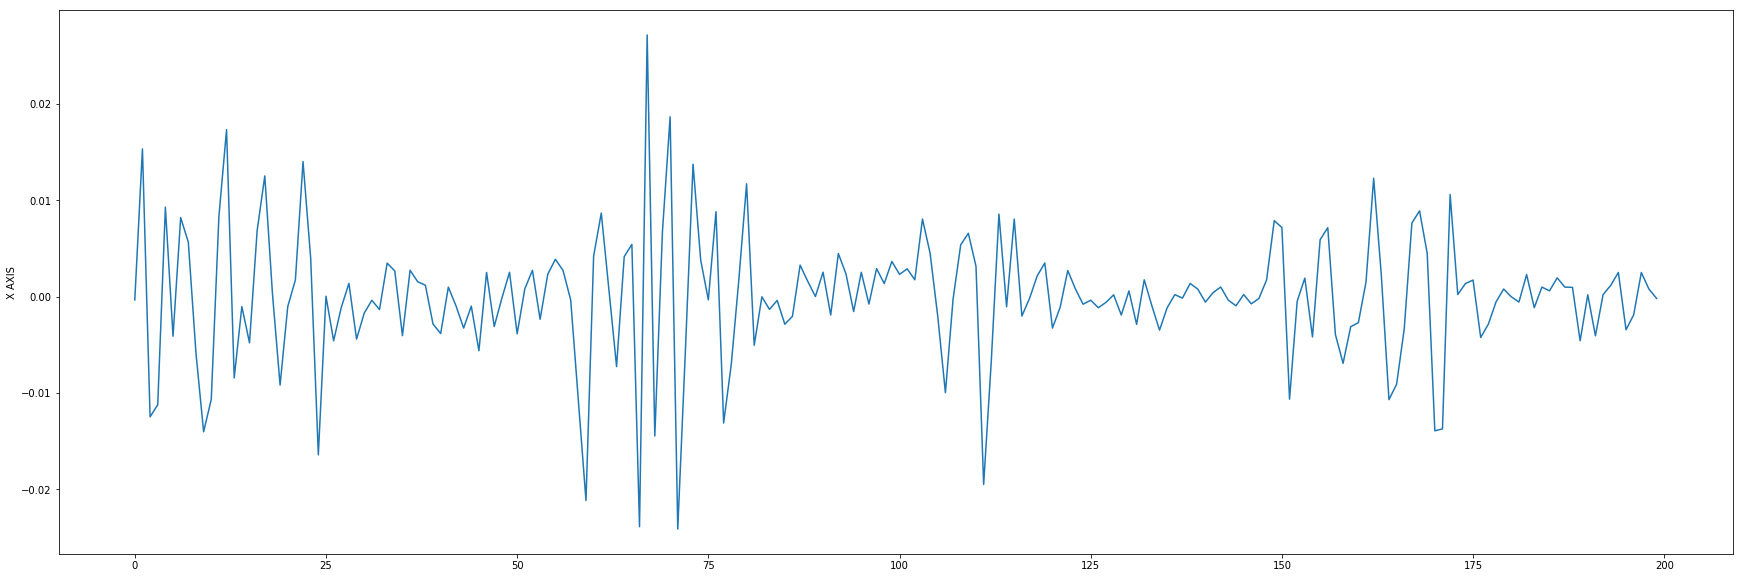

In [17]:
queue_file = '3.csv' 
stand_file = '4.csv'
walk_file = '5.csv'
col = ['X AXIS', 'Y AXIS', 'Z AXIS','ACC MAGNITUDE', 'Gyro_filter_X',
       'Gyro_filter_Y', 'Gyro_filter_Z','x_magno', 'y_magno', 'z_magno', 'MAGNETOMETER']
l = 200


for file_ in [queue_file,stand_file,walk_file]:
    data = pd.read_csv(file_)
    fig,axs = plt.subplots(figsize=(30,10))
    sns.lineplot(y = data[col[0]][:l], x = np.arange(l), ax=axs)
    plt.show()


In [3]:
import keras
from keras.models import load_model
model2 = load_model('best_model_q.hdf5')
model1 = load_model('best_model_sw.hdf5')

Using TensorFlow backend.


In [4]:
clf1_data,clf2_data = np.load('./s_w_q_clf1.npy'),np.load('./s_w_q_clf2.npy')
x_train1,y_train1,x_test1,y_test1 = clf1_data
x_train2,y_train2,x_test2,y_test2 = clf2_data


In [5]:
from keras import backend as K
from sklearn.metrics import  accuracy_score,confusion_matrix

f = K.function([model1.input],[model1.layers[-2].output])
print(model1.layers[-2])
y_pred1 = model1.predict(x_test2)
x_train2 = f([x_train2])[0]
x_test2 = f([x_test2])[0]
y_pred2 = model2.predict(x_test2)
intm1 = model2.predict(x_test2)
intm1 = np.argmax(intm1,axis=1)
intm = model1.predict(x_test1)
intm = np.argmax(intm,axis=1)
y_true1 = np.argmax(y_test1,axis=1)
y_true2 = np.argmax(y_test2,axis=1)
print(accuracy_score(y_true1,intm))
print(confusion_matrix(y_true1,intm))
print(confusion_matrix(y_true2,intm1))

AxisError: axis 1 is out of bounds for array of dimension 1

In [71]:
y_true1 = np.argmax(y_test1,axis=1)
y_true2 = np.argmax(y_test2,axis=1)
from sklearn.metrics import  accuracy_score,confusion_matrix
print(accuracy_score(y_true1,intm))
print(confusion_matrix(y_true1,intm))
print(confusion_matrix(y_true2,intm1))